# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import  sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


Using TensorFlow backend.


In [91]:
ds = pd.read_csv('tic-tac-toe.csv')
ds.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [92]:
ds.dtypes

TL       object
TM       object
TR       object
ML       object
MM       object
MR       object
BL       object
BM       object
BR       object
class      bool
dtype: object

In [93]:
# replacing string with numbers
ds = ds.replace({'x': 1, 'o': 0, 'b': 2, True: 1, False: 0})
ds.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,2,2,1
4,1,1,1,1,0,0,2,0,2,1


In [94]:
# converting to numeric
ds = ds.apply(pd.to_numeric, errors='coerce')

In [95]:
ds.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1,1,1,1,0,0,1,0,0,1
1,1,1,1,1,0,0,0,1,0,1
2,1,1,1,1,0,0,0,0,1,1
3,1,1,1,1,0,0,0,2,2,1
4,1,1,1,1,0,0,2,0,2,1


In [96]:
#checking it has been done
ds.dtypes

TL       int64
TM       int64
TR       int64
ML       int64
MM       int64
MR       int64
BL       int64
BM       int64
BR       int64
class    int64
dtype: object

In [97]:
# Separating inputs and output
output = ds['class'].values
inputs = ds.drop('class', axis = 1).values

In [98]:
# Normalize data
scaler = StandardScaler()
inputs_norm = scaler.fit_transform(inputs)

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [99]:
# your code here
input_train, input_test, output_train, output_test = train_test_split(inputs_norm, output, test_size = 0.2)

In [100]:
# adjusting shapes (flattening data)
input_train = input_train.reshape((-1, 9)) # set -1 because we don't care of how nr of rows
input_test = input_test.reshape((-1, 9))

In [101]:
#checking shapes
print('input train', input_train.shape, '\ninput_test',input_test.shape)
print('output train', output_train.shape,'\noutput_test', output_test.shape)

input train (766, 9) 
input_test (192, 9)
output train (766,) 
output_test (192,)


In [102]:
# Defining and building model
model = Sequential([
  Dense(64, activation='relu', input_shape=(9,)), 
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(2, activation='softmax'),
])

In [103]:
# Compiling model
model.compile( 
  optimizer='rmsprop',
  loss='binary_crossentropy', # loss function type (discrete categorical output)
  metrics=['accuracy'], # performance metric
)

In [104]:
# Traning/Fitting data
history = model.fit(
  input_train, #input train data
  to_categorical(output_train), #output train data
  epochs=5, 
  batch_size=32,
)

Epoch 1/5
766/766 [==============================] - 0s 497us/step - loss: 0.6259 - accuracy: 0.6606
Epoch 2/5
766/766 [==============================] - 0s 118us/step - loss: 0.5309 - accuracy: 0.7115
Epoch 3/5
766/766 [==============================] - 0s 183us/step - loss: 0.4488 - accuracy: 0.7742
Epoch 4/5
766/766 [==============================] - 0s 177us/step - loss: 0.3756 - accuracy: 0.8198
Epoch 5/5
766/766 [==============================] - 0s 151us/step - loss: 0.3040 - accuracy: 0.8642


In [105]:
# Evaluate the model.
model.evaluate(
  input_test, #test input data
  to_categorical(output_test) #test output data
)

192/192 [==============================] - 0s 296us/step


[0.44218401114145917, 0.78125]

In [106]:
# saving model
model.save_weights('tic-tac-toe.model')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [107]:
# your code here
model.load_weights('tic-tac-toe.model')

predictions = model.predict(input_test[:5])
print(np.argmax(predictions, axis=1))
print(output_test[:5])

[0 1 1 1 0]
[1 1 1 0 0]


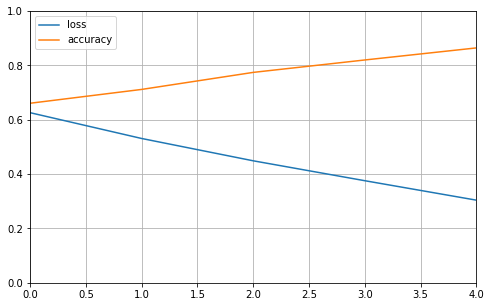

In [108]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

In [109]:
# your code here
# changes have been done above in my model.


**Which approach(es) did you find helpful to improve your model performance?**

In [110]:
# your answer here
'''
- added more layers in my model before.
- changed the optimizer type to binary classification
- changed the loss function to binary classification'''


'\n- added more layers in my model before.\n- changed the optimizer type to binary classification\n- changed the loss function to binary classification'